In [40]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt

import importlib

from astroLuSt.synthetics import dataaugmentation as ald

from tensorflow.keras.preprocessing.image import ImageDataGenerator

(23, 50, 10, 3)
(23, 50, 1)
(23, 1)


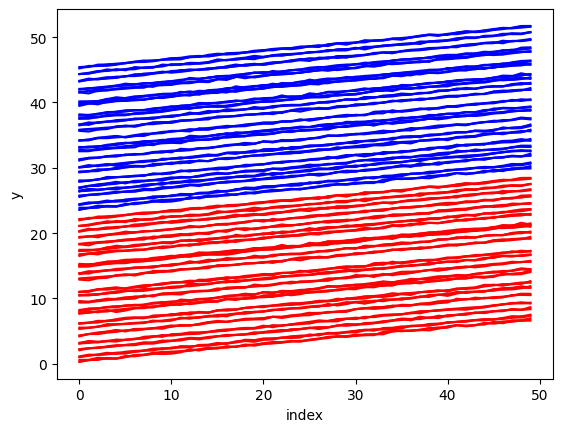

In [362]:
def generate_4d(
    shape:tuple=None,
    xmin:float=0, xmax:float=1,
    func=None
    ):
    if shape is None:
        shape = (1,20,1,1)
    if func is None:
        func = lambda x: x
    X = np.empty(shape)
    for i, xi in enumerate(X):
        x_ = np.linspace(np.zeros((X.shape[-2],X.shape[-1]))+xmin, xmax, X.shape[1])
        
        hshift = np.random.rand(x_.shape[1]).reshape(1,-1,1)
        vshift = np.zeros_like(x_)+i
        cnoise = np.random.randn(x_.shape[0], x_.shape[2]).reshape(50,1,-1)*0.1
        vshift[:,1,:] += X.shape[0]
        X[i] = func(x_+hshift) + vshift + cnoise

    return X

X = generate_4d(
    shape=(23,50,10,3),
    xmin=0, xmax=2*np.pi,
    # func=np.sin,
    func=None,
)
X3d = X[:,:,0,0]
X3d = X3d.reshape(*X3d.shape,1)
y = np.random.choice([0,1,2],size=(X.shape[0],1), replace=True,  p=[0.5,0.3,0.2])

print(X.shape)
print(X3d.shape)
print(y.shape)
#visualize
fig = plt.figure()
ax1 = fig.add_subplot(111)
for x in X:
    ax1.plot(x[:,0,:], 'r-')
    # ax1.plot(x[:,1,0], 'r-')
    ax1.plot(x[:,1,:], 'b-')
ax1.set_xlabel('index')
ax1.set_ylabel('y')
plt.show()

AugmentAxis(
    nsamples=7,
    ntransformations=-1, methods=['add_noise', 'crop', 'flip_axis', 'obscure_observations', 'rescale', 'shift_features'], transform_order='unchanged',
    shift=(0, 20),
    flip=False,
    npoints=5, neighbors=True,
    fill_value_obscure=0, fill_value_range=(0, 1),
    cutout_start=0, cutout_size=(4, 6),
    interpkind='linear', fill_value_crop='extrapolate',
    noise_mag=0,
    feature_range_min=0, feature_range_max=(3, 9),
    axis=(0, 1),
    seed=None,
    verbose=1,
)
[50]
{'flip': False, 'npoints': 18, 'cutout_start': 25, 'cutout_size': 27, 'noise_mag': 2.44640527981715, 'feature_range_min': 0.3860608312809674, 'feature_range_max': 0.721646542279028, 'axis': (0,)}


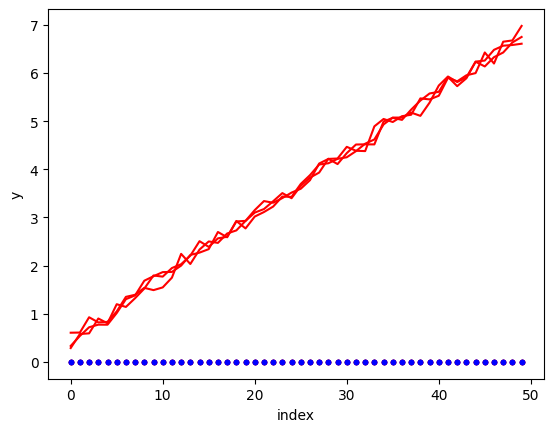

In [442]:
importlib.reload(ald)
AA = ald.AugmentAxis(
    nsamples=7,
    shift=(0,20), methods=None, transform_order=None,
    npoints=5, neighbors=True,
    fill_value_obscure=0, fill_value_range=(0,1),
    cutout_start=0, cutout_size=(4,6),
    interpkind=None, fill_value_crop=None,
    noise_mag=None,
    feature_range_min=0, feature_range_max=(3,9),
    axis=(0,1),
    seed=None,
    verbose=1,
)
print(AA)

# for i in range(1):

#     x_ = AA.apply_transform(
#         # X3d[0],
#         X[0],
#         ntransformations=-1,
#         transform_parameters={'noise_mag':3,'axis':(0)},
#         methods=None,
#         # methods=[ 'obscure_observations', 'rescale',],
#         # methods=[ 'obscure_observations'],
#         # methods=[ 'rescale'],
#         transform_order='random',
#         # transform_order='unchanged',
#         # transform_order=None,
#     )
# print(x_.shape)

AA.fit(X)
# AA.get_random_transform(X.shape[1:], axis=(0,1))
AA.random_transform(X[0], axis=(0,1))
X_new, y_new, y1  = AA.flow(X,
# X_new = AA.flow(X,
    y=y,
    X_misc=[y],
    # sample_weights=np.ones(len(X))/len(X)),
    sample_weights=None,
)


#visualize
fig = plt.figure()
ax1 = fig.add_subplot(111)
#4d
ax1.plot(X[0,:,0,:], 'r-')
# ax1.plot(X[0,:,1,:], 'b-')
ax1.plot(X_new[0,:,0,:], 'r.')
ax1.plot(X_new[0,:,1,:], 'b.')
# ax1.plot(x_[:,1,0], 'b.')
# ax1.plot(x_[:,1,1], 'r.')
# ax1.plot(x_[:,1,2], 'g.')

#3d
# ax1.plot(X3d[0,:], 'r-')
# ax1.plot(x_[:,0], 'r.')


ax1.set_xlabel('index')
ax1.set_ylabel('y')
plt.show()